## Testing 2D Propagation

## Testing 2D Propagation

In [7]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo


## Fraunhofer Diffraction through Pinhole

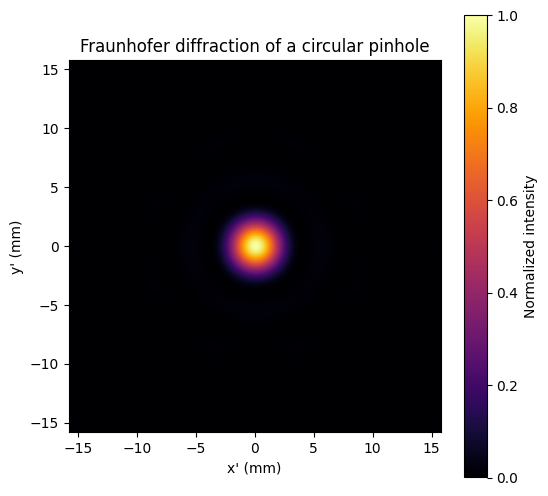

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
wavelength = 633e-9      # 633 nm
dx = 10e-6               # pixel size 10 µm
N = 512                  # grid size
z = 0.5                  # propagation distance in meters
r_pinhole = 50e-6        # pinhole radius, 50 µm

# -------------------------
# Coordinate grid
# -------------------------
X, Y = fo.coords((N, N), dx)

# -------------------------
# Pinhole aperture
# -------------------------
u_fraunhofer = np.zeros((N, N), dtype=complex)
u_fraunhofer[(X**2 + Y**2) < r_pinhole**2] = 1.0

# -------------------------
# 2D Fraunhofer propagation
# -------------------------
U_fraunhofer, out_dx = fo.fraunhofer_2D(u_fraunhofer, dx, wavelength, z)

# Output coordinates
x_out = (np.arange(N)-N//2) * out_dx

# -------------------------
# Plot intensity
# -------------------------
plt.figure(figsize=(6,6))
plt.imshow(np.abs(U)**2 / np.max(np.abs(U)**2),
           extent=[x_out[0]*1e3, x_out[-1]*1e3, x_out[0]*1e3, x_out[-1]*1e3],
           cmap='inferno')
plt.xlabel("x' (mm)")
plt.ylabel("y' (mm)")
plt.title("Fraunhofer diffraction of a circular pinhole")
plt.colorbar(label="Normalized intensity")
plt.show()


## Fresnel Transfer Func, Pinhole

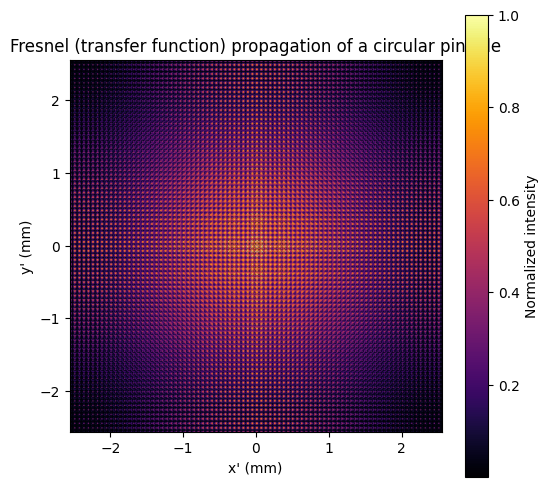

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
wavelength = 633e-9      # 633 nm
dx = 10e-6               # pixel size 10 µm
N = 512                  # grid size
z = 0.5                  # propagation distance in meters
r_pinhole = 50e-6        # pinhole radius, 50 µm

# -------------------------
# Coordinate grid
# -------------------------
X, Y = fo.coords((N, N), dx)

# -------------------------
# Pinhole aperture
# -------------------------
u0 = np.zeros((N, N), dtype=complex)
u0[(X**2 + Y**2) < r_pinhole**2] = 1.0

# -------------------------
# 2D Fresnel propagation (transfer function)
# -------------------------
U_fresnel = fo.fresnel_tf_2D(u0, dx, wavelength, z)

# -------------------------
# Plot intensity
# -------------------------
plt.figure(figsize=(6,6))
plt.imshow(np.abs(U_fresnel)**2 / np.max(np.abs(U_fresnel)**2),
           extent=[X.min()*1e3, X.max()*1e3, Y.min()*1e3, Y.max()*1e3],
           cmap='inferno')
plt.xlabel("x' (mm)")
plt.ylabel("y' (mm)")
plt.title("Fresnel (transfer function) propagation of a circular pinhole")
plt.colorbar(label="Normalized intensity")
plt.show()


## Angular Spectrum Method, Pinhole

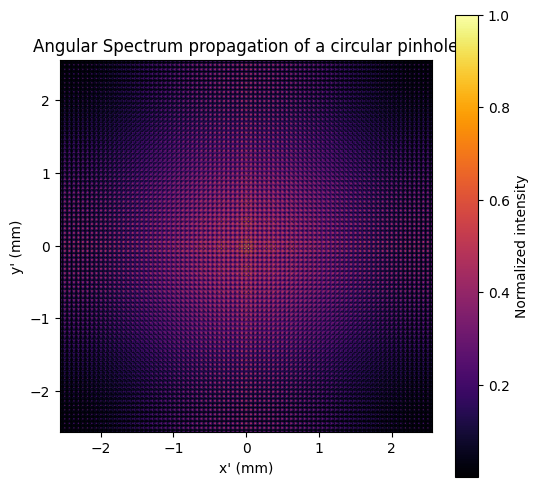

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
wavelength = 633e-9      # 633 nm
dx = 10e-6               # pixel size 10 µm
N = 512                  # grid size
z = 0.5                  # propagation distance in meters
r_pinhole = 50e-6        # pinhole radius, 50 µm

# -------------------------
# Coordinate grid
# -------------------------
X, Y = fo.coords((N, N), dx)

# -------------------------
# Pinhole aperture
# -------------------------
u0 = np.zeros((N, N), dtype=complex)
u0[(X**2 + Y**2) < r_pinhole**2] = 1.0

# -------------------------
# 2D Angular Spectrum propagation
# -------------------------
U_as = fo.angular_spectrum_2D(u0, dx, wavelength, z)

# -------------------------
# Plot intensity
# -------------------------
plt.figure(figsize=(6,6))
plt.imshow(np.abs(U_as)**2 / np.max(np.abs(U_as)**2),
           extent=[X.min()*1e3, X.max()*1e3, Y.min()*1e3, Y.max()*1e3],
           cmap='inferno')
plt.xlabel("x' (mm)")
plt.ylabel("y' (mm)")
plt.title("Angular Spectrum propagation of a circular pinhole")
plt.colorbar(label="Normalized intensity")
plt.show()


## Check Energy

In [11]:
# -------------------------
# Energy check
# -------------------------
E_in = fo.utils.energy(u0)
E_fraunhofer = fo.utils.energy(U_fraunhofer)
E_fresnel = fo.utils.energy(U_fresnel)
E_as = fo.utils.energy(U_as)

print("Input energy:", E_in)
print("Fraunhofer energy:", E_fraunhofer, "relative:", E_fraunhofer / E_in)
print("Fresnel energy:", E_fresnel, "relative:", E_fresnel / E_in)
print("Angular Spectrum energy:", E_as, "relative:", E_as / E_in)

Input energy: 69.0
Fraunhofer energy: 18087936.000000007 relative: 262144.0000000001
Fresnel energy: 69.00000000000001 relative: 1.0000000000000002
Angular Spectrum energy: 69.0 relative: 1.0


In [12]:
dx_out = wavelength * z / (N*dx)  # already returned from fraunhofer_2D
E_fraunhofer_correct = np.sum(np.abs(U_fraunhofer)**2) * dx_out**2
print("Fraunhofer energy (corrected):", E_fraunhofer_correct)
print("Relative:", E_fraunhofer_correct / E_in)


Fraunhofer energy (corrected): 0.06911885250000001
Relative: 0.0010017225000000002
